In [318]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [319]:
mpg = sns.load_dataset("mpg")
print(mpg.head()) 

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [320]:
mpg.describe 

<bound method NDFrame.describe of       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle mali

In [321]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [322]:
mpg = mpg.dropna()
print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB
None


In [323]:
print(mpg.head(233).values)

[[18.0 8 307.0 ... 70 'usa' 'chevrolet chevelle malibu']
 [15.0 8 350.0 ... 70 'usa' 'buick skylark 320']
 [18.0 8 318.0 ... 70 'usa' 'plymouth satellite']
 ...
 [16.0 8 351.0 ... 77 'usa' 'ford thunderbird']
 [29.0 4 97.0 ... 77 'europe' 'volkswagen rabbit custom']
 [24.5 4 151.0 ... 77 'usa' 'pontiac sunbird coupe']]


In [324]:
#Remplacement par la moyenne
#mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True)
#Remplacement par la mediane
#mpg['weight'].fillna(mpg['weight'].median(), inplace=True)
#Remplacement par la valeur la plus frequente (mode)
#mpg['origin'].fillna(mpg['origin'].mode()[0], inplace=True) 

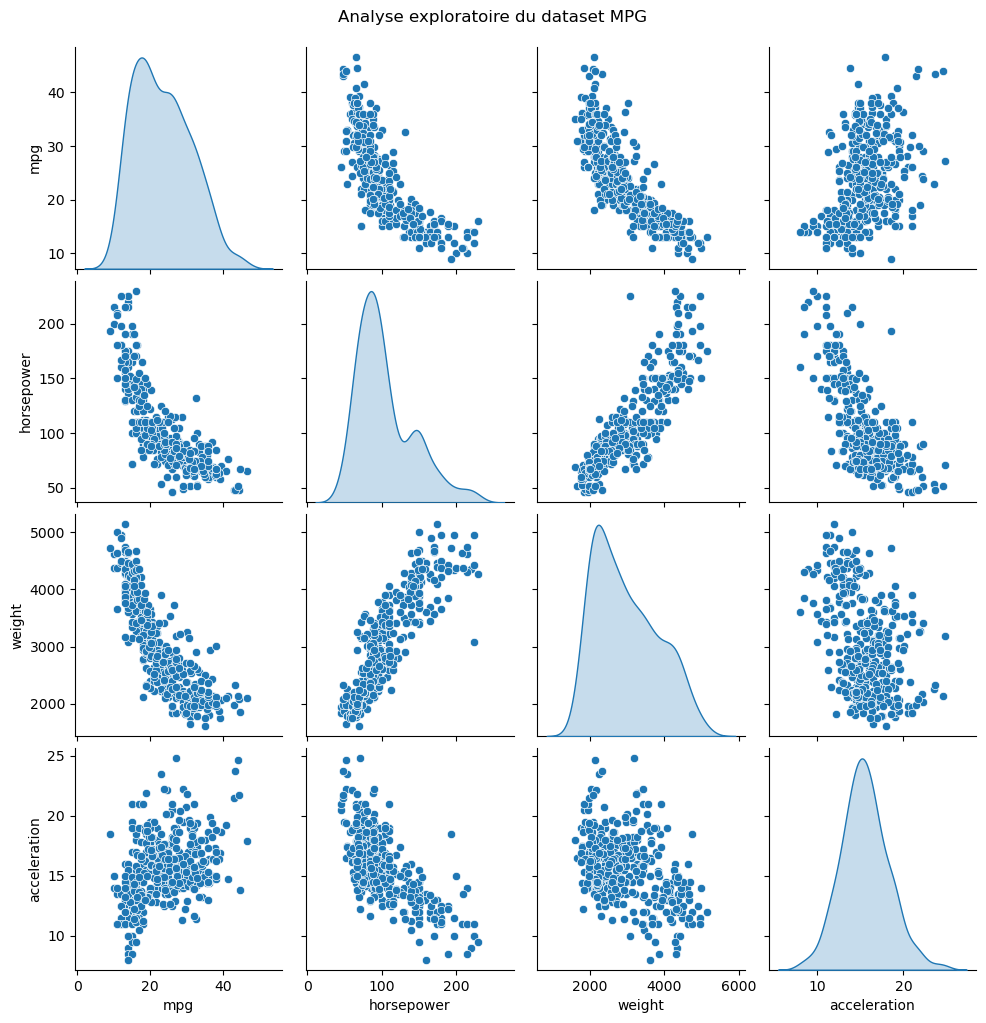

In [325]:
sns.pairplot(mpg[['mpg', 'horsepower', 'weight', 'acceleration']],diag_kind='kde')
plt.suptitle("Analyse exploratoire du dataset MPG", y=1.02)
plt.show()

In [326]:
X= mpg[['horsepower']].values
Y= mpg['mpg'].values

In [327]:
X_mean, X_std = X.mean(), X.std()
#X_min, X_max = X.max(),X.min()
X = (X - X_mean) / X_std
#X=(X-X_min)/(X_max-X_min)

In [328]:
Y.shape

(392,)

In [329]:
X.shape

(392, 1)

In [330]:
Y=Y.reshape(len(Y),1)

In [331]:
Y.shape

(392, 1)

In [332]:
u=np.ones((X.shape[0],1))

In [333]:
X=np.hstack((X,u))

In [334]:
X.shape

(392, 2)

In [335]:
theta=np.random.randn(X.shape[1],1)

In [336]:
theta

array([[0.99497844],
       [0.80979209]])

In [337]:
def model(x,theta):
    return np.dot(x,theta)

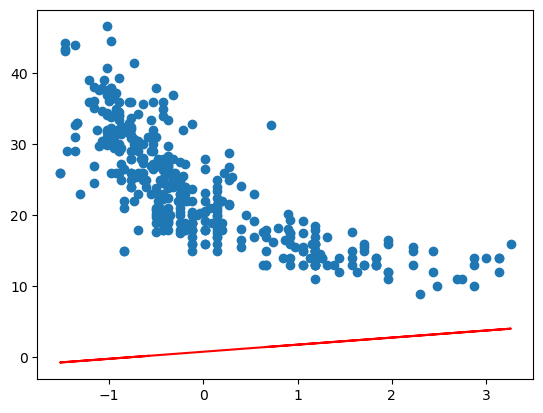

In [338]:
predictions = model(X,theta)
plt.scatter(X[:,0],Y)
plt.plot(X[:,0], predictions, c='r')

In [339]:
def cost_fonction(x,y,theta):
    m=len(y)
    return 1/m*np.sum((model(x,theta)-y)**2)

In [340]:
def grad(x,y,theta):
    m=len(y)
    return 2/m*x.T.dot(model(x,theta)-y)

In [341]:
def descent_gradient(x, y, theta, alpha, n):
    cost_history = []   
    for i in range(n):
        theta = theta - alpha * grad(x, y, theta)   
        cost = cost_fonction(x, y, theta)                  
        cost_history.append(cost)                         
    return theta, cost_history

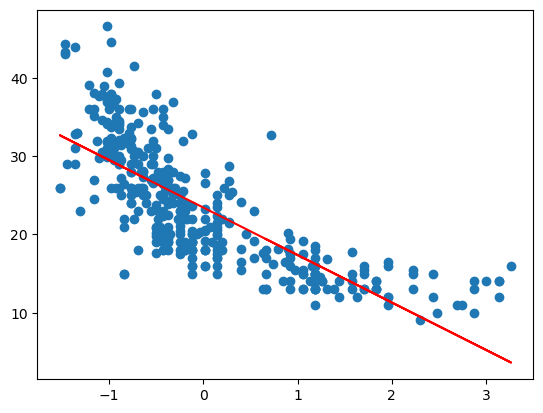

In [342]:
alpha = alpha = 0.01
n = 6000
theta_final, cost_history = descent_gradient(X, Y, theta, alpha, n)
predictions = model(X, theta_final)
plt.scatter(X[:,0], Y)
plt.plot(X[:,0] ,predictions, color='r')
plt.show()

In [343]:
theta_final

array([[-6.0678724 ],
       [23.44591837]])

In [344]:
cost_history[-1]

23.943662938603097

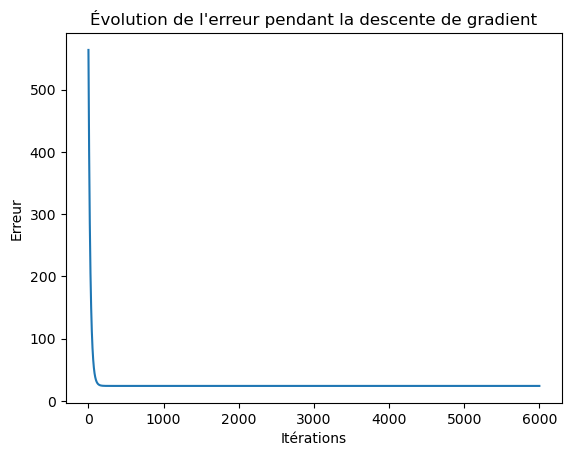

In [345]:
plt.plot(range(len(cost_history)),cost_history)
plt.xlabel("Itérations")
plt.ylabel("Erreur")
plt.title("Évolution de l'erreur pendant la descente de gradient")
plt.show()

In [346]:
def coef_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [347]:
R2_1 = coef_determination(Y,predictions)

In [348]:
R2_1 

0.6059482578894351